## Insurance 

**About Dataset**

Context

**Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.**

Content

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub here.

Inspiration
Can you accurately predict insurance costs?

In [3]:
# importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to building model
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Filter out future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# reading files
data=pd.read_csv("insurance.csv")
df=data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# checking shape of dataframe
df.shape

(1338, 7)

In [6]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- age , bmi ,children , charges is inteager or float.
- sex , smoker , region is Object.

In [8]:
# checking discriptive 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- average age is 39 yr.| min. age is 18 yr. | max. age is 64 year old.
- body mass index average is 30 | max is 53 | min is around 15.
- children feature has average 1 |max. 5 | min. 0.

In [10]:
# checking descriptive of categorical 
df.describe(exclude=np.number).T


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


- there are 2 unique values in sex feature.male is 676 times.
- there are 2 unique values in smoker feature .no is 1064 times
- region has 4 unique values southeast is top 364 times.

In [12]:
# checking duplicated
df.duplicated().sum()

1

- there are 1 duplicates present in dataset. we will remove it as we will go further

In [14]:
# removing duplicates
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

- there are no duplicated in dataset.

## 

## Exploratory Data Analysis

#### Univariate analysis & multivariate

#### AGE

In [21]:
# checking age 
df.age.value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

- most of the people are youngester. 18 or 19 age.

#### SEX

In [24]:
#checking sex feature
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

- 675 is male and 662 is female in sex feature.

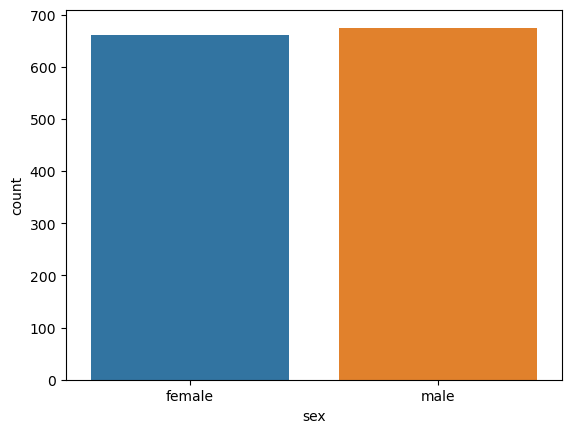

In [26]:
#visualizing sex feature
sns.countplot(df,x="sex");

- male and female ratio is approx same

#### BMI

In [29]:
# checking bmi
df.bmi.value_counts()

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

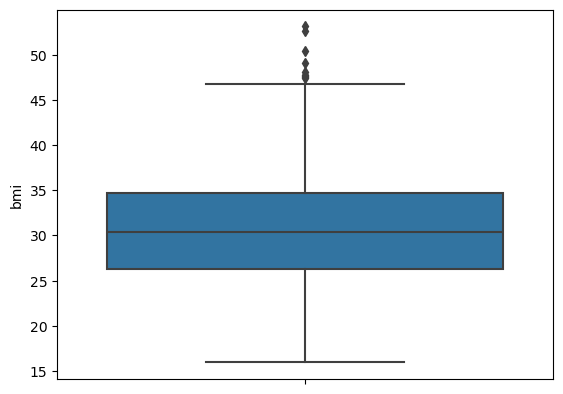

In [30]:
#visualizing bmi 
sns.boxplot(df,y="bmi");

- there are few outlier present in bmi.
- there might have some sort of pesent.
  

#### CHILDREN

In [33]:
#checking children
df.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

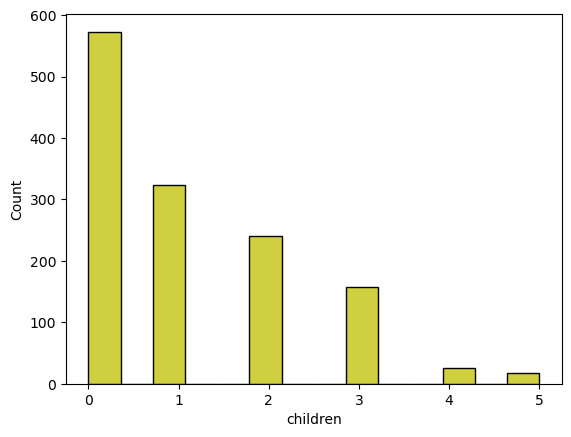

In [34]:
# visualizing children
sns.histplot(df,x="children",color="y");

- most of the people had no children.

#### SMOKER

In [37]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

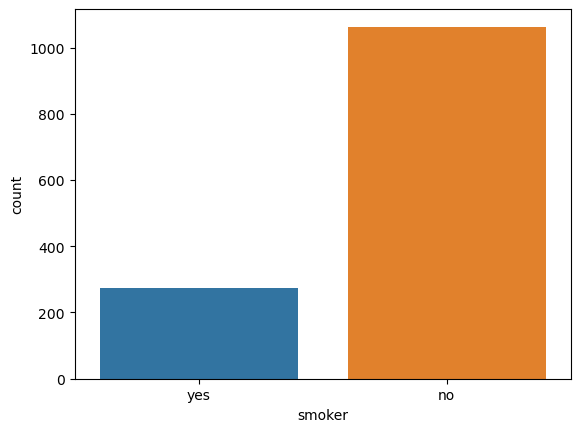

In [38]:
# visualizing smoker
sns.countplot(df,x="smoker");

- most of the people not smoking.

#### REGION

In [41]:
# checking region
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

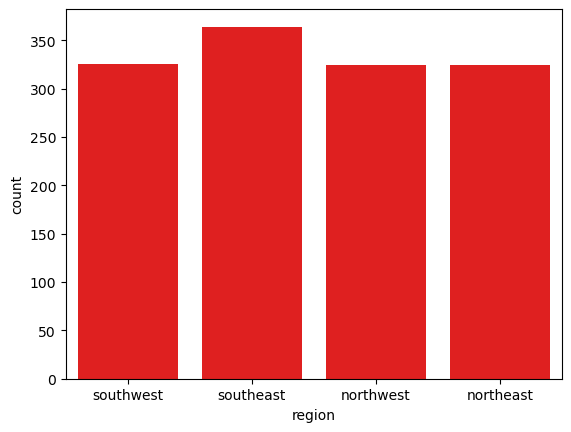

In [42]:
# visualizing region

sns.countplot(df,x="region",color="r");

- south east region is top in usa.

#### CHARGES

In [45]:
# checking charges
df.charges.sum()

17754185.427659

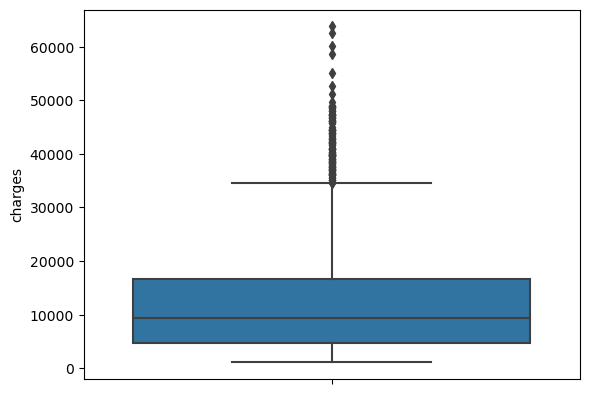

In [46]:
# visualizing charges;
sns.boxplot(df,y="charges");

- charges are also present outlier.

## DATA PREPROCESSING

In [49]:
# numeric feature
num_df=df.select_dtypes(include=np.number)

In [50]:
# checking null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- there are no missing values.

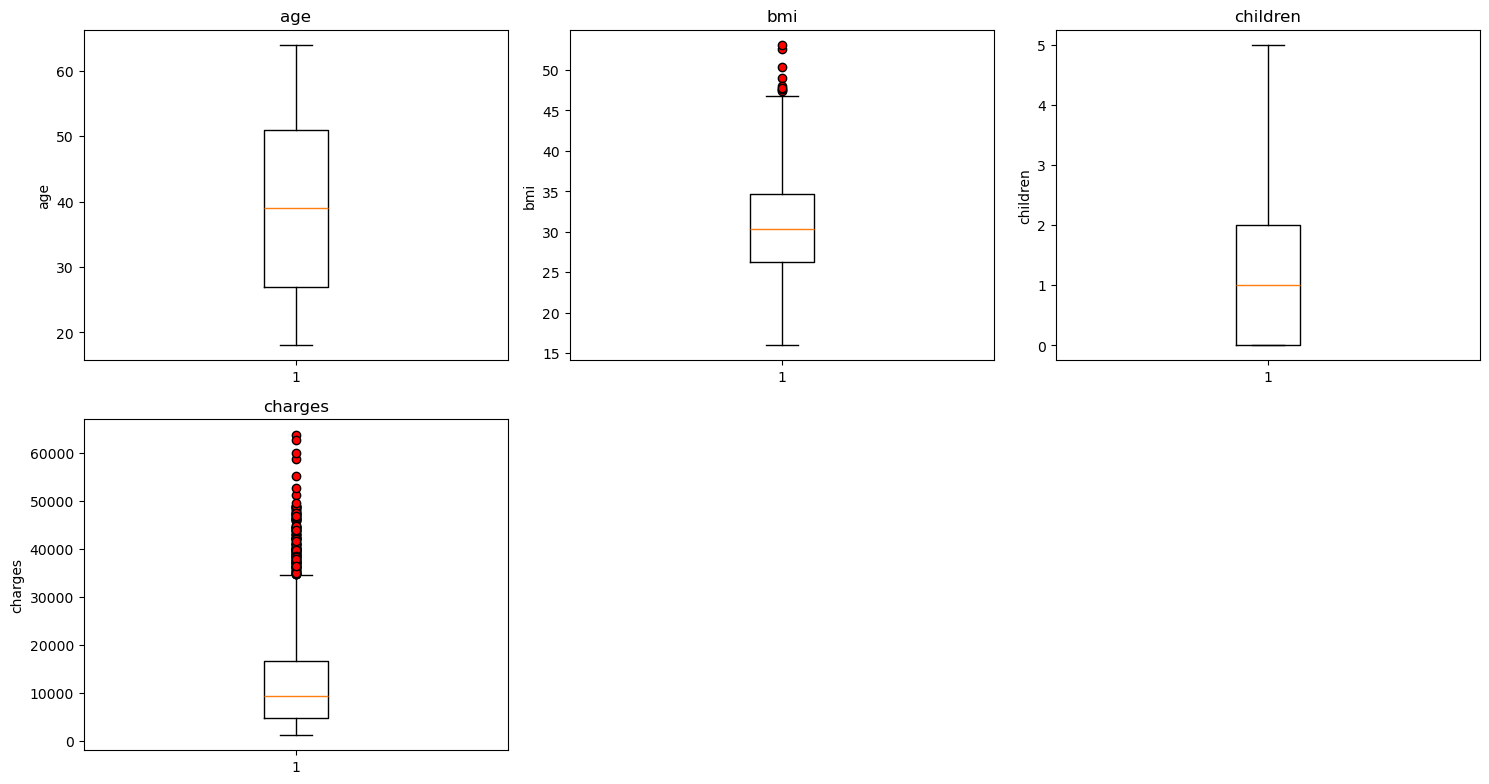

In [52]:
plt.figure(figsize=(15, 35))  # figure area size
red_dot = dict(markerfacecolor="red", marker="o")  # to make the outliers in red dots using flierprops

for i, variable in enumerate(num_df.columns):
    plt.subplot(9, 3, i + 1)

    # Convert the column to numeric (if needed)
    num_df[variable] = pd.to_numeric(num_df[variable], errors='coerce')

    # Drop NaN or missing values
    num_df_cleaned = num_df[variable].dropna()

    plt.boxplot(num_df_cleaned, whis=1.5, flierprops=red_dot)  # adjust whis if needed
    plt.title(variable)
    plt.ylabel(variable)  # add y-axis label for better readability
    plt.tight_layout()

plt.show()


- so we have outlier in charges and bmi features only.assuming all are real data.

In [54]:
# checking coreleation
coreleation=num_df.corr()
coreleation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


- there is no strong coreleation in df.

In [56]:
# Mapping dictionary
sex_map = {'male': 1, 'female': 2}
smoke={"yes":1,"no":2}
reg={"southeast":1 , "southwest":2 , "northwest":3 , "northeast":4}


# Convert 'Sex' column using lambda function
df['sex'] = df['sex'].apply(lambda x: sex_map.get(x, x))  # Use .get() method to handle unknown keys gracefully
df['smoker'] = df['smoker'].apply(lambda x: smoke.get(x, x))
df['region'] = df['region'].apply(lambda x: reg.get(x, x))
df


/var/folders/xc/2sw1p49174924vg6v0vhtq8c0000gn/T/ipykernel_8302/1676467286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].apply(lambda x: sex_map.get(x, x))  # Use .get() method to handle unknown keys gracefully
/var/folders/xc/2sw1p49174924vg6v0vhtq8c0000gn/T/ipykernel_8302/1676467286.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = df['smoker'].apply(lambda x: smoke.get(x, x))
/var/folders/xc/2sw1p49174924vg6v0vhtq8c0000gn/T/ipykernel_8302/1676467286.py:10: Set

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,2,1,1725.55230
2,28,1,33.000,3,2,1,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,3,10600.54830
1334,18,2,31.920,0,2,4,2205.98080
1335,18,2,36.850,0,2,1,1629.83350
1336,21,2,25.800,0,2,2,2007.94500


In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,2,1,1725.55230
2,28,1,33.000,3,2,1,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520


In [58]:
df1=df.copy()

In [59]:
# Let's first define our X and y variables
X =df1.drop(["charges"], axis=1)## these are independent variables
y = df1["charges"]

In [60]:
#displaying x and y
print(X.head())
print("*"*50)
print(y.head())

   age  sex     bmi  children  smoker  region
0   19    2  27.900         0       1       2
1   18    1  33.770         1       2       1
2   28    1  33.000         3       2       1
3   33    1  22.705         0       2       3
4   32    1  28.880         0       2       3
**************************************************
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [61]:
X = sm.add_constant(X)

#### SPLITING DATASET

In [63]:
# Let's split the data in 70:30 ratio to use a training data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)


In [64]:
# and now lets see how many values in each data set
print("Number of rows in training data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in training data = 935
Number of rows in test data = 402


## Building Model

In [66]:
#ols model for training data set
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     476.1
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          3.30e-279
Time:                        16:36:31   Log-Likelihood:                -9471.4
No. Observations:                 935   AIC:                         1.896e+04
Df Residuals:                     928   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.068e+04   1704.829     17.994      0.0

- r2 is 76 .further we trying to improve r2.

## Model Performance Check

In [69]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
 r2 = r2_score(targets, predictions)
 n = predictors.shape[0]
 k = predictors.shape[1]
 return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
# function to compute MAPE
def mape_score(targets, predictions):
 return np.mean(np.abs(targets - predictions) / targets) * 100
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
 """
 Function to compute different metrics to check regression model performance
 model: regressor
 predictors: independent variables
 target: dependent variable
 """
 # predicting using the independent variables
 pred = model.predict(predictors)
 r2 = r2_score(target, pred) # to compute R-squared
 adjr2 = adj_r2_score(predictors, target, pred) # to compute adjusted R-squared
 rmse = np.sqrt(mean_squared_error(target, pred)) # to compute RMSE
 mae = mean_absolute_error(target, pred) # to compute MAE
 mape = mape_score(target, pred) # to compute MAPE
 # creating a dataframe of metrics
 df_perf = pd.DataFrame(
 {
 "RMSE": rmse,
 "MAE": mae,
 "R-squared": r2,
 "Adj. R-squared": adjr2,
 "MAPE": mape,
 },
 index=[0],
 )
 return df_perf

In [70]:
# Now let's check model performance on train set
print("Training Performance\n")
olsmodel_tr_perf = model_performance_regression(olsmodel, x_train, y_train)
print("Training Performance")
olsmodel_tr_perf

Training Performance

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6068.811624,4359.473247,0.754813,0.752962,44.904626


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
print("Test Performance")
olsmodel_test_perf

Test Performance

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6044.273081,4207.514204,0.733286,0.728547,47.803173


- rmse is too high try to reduce rmse.

## Cross Validation

Linear Regression: Mean MSE: 36869902.0556, Std deviation: 2319922.9183
Gradient Boosting: Mean MSE: 20877538.1797, Std deviation: 3382230.0362
AdaBoost Regression: Mean MSE: 26367093.0749, Std deviation: 3018898.3089
XGB Regression: Mean MSE: 28138943.4373, Std deviation: 3660474.3223
Ridge Regression: Mean MSE: 36869377.9897, Std deviation: 2309584.6431
Lasso Regression: Mean MSE: 36869225.1446, Std deviation: 2318257.8965


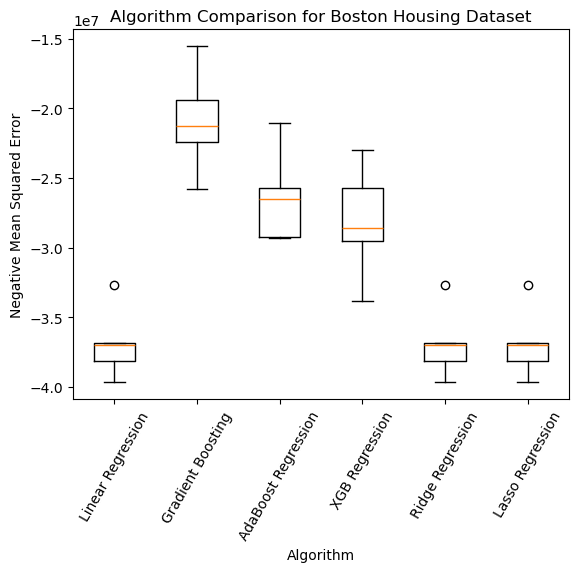

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Initialize models
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('AdaBoost Regression', AdaBoostRegressor()))
models.append(('XGB Regression', XGBRegressor()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))

# Evaluate each model using cross-validation
results = []
names = []
scoring = 'neg_mean_squared_error'  # Using negative MSE as scoring for regression

for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), (name, model)])
    cv_results = cross_val_score(pipeline, X, y, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean MSE: {-cv_results.mean():.4f}, Std deviation: {cv_results.std():.4f}")

# Boxplot for comparing algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison for Boston Housing Dataset')
plt.xlabel('Algorithm')
plt.ylabel('Negative Mean Squared Error')
plt.xticks(rotation=60)
plt.show()


- Gradient boosting and adaboosting has less rmse according to other model.

In [76]:
# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model
gb_regressor.fit(x_train, y_train)

# Initialize AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=42)

# Train the model
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [77]:
# Now let's check model performance on train set
print("Training Performance\n")
olsmodel= model_performance_regression(gb_regressor, x_train, y_train)
print("Training Performance")
olsmodel

Training Performance

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3754.55299,2076.991327,0.906156,0.905447,24.949099


In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test = model_performance_regression(gb_regressor, x_test, y_test)
print("Test Performance")
olsmodel_test

Test Performance

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4381.276606,2436.254824,0.859861,0.857371,29.110643


- this model is performing well but its overfit model.

In [80]:
# Now let's check model performance on train set
print("Training Performance\n")
olsmodel_final= model_performance_regression(ada_regressor, x_train, y_train)
print("Training Performance")
olsmodel_final

Training Performance

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4952.050551,3870.258679,0.836747,0.835515,64.919725


In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_final = model_performance_regression(ada_regressor, x_test, y_test)
print("Test Performance")
olsmodel_test_final

Test Performance

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4987.542906,3898.393831,0.818393,0.815167,68.142567


-  adaboost performing well
-  adaboost is not overfit it work well in future.

## Pipeline

In [136]:
# param_grid = {
#     'regressor__n_estimators': [50, 100, 200], 
#     'regressor__learning_rate': [0.01, 0.1, 1.0]  
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# # Fit GridSearchCV
# grid_search.fit(x_train, y_train)

# # Best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Lowest MSE found: ", -grid_search.best_score_)

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('Lasso Regression', Lasso())]). Valid parameters are: ['memory', 'steps', 'verbose'].